# Investigate the data sets already available on renku

### Imports

In [1]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt

import xarray as xr
xr.set_options(display_style='text')
import numpy as np

from dask.utils import format_bytes
import xskillscore as xs

%matplotlib inline 
#so that figures appear again

C:\Users\ab6801\.conda\envs\s2s-ai-new\lib\site-packages\ecmwflibs\__init__.py:75: UserWarning: DLL load failed while importing _ecmwflibs: Die angegebene Prozedur wurde nicht gefunden.
  warnings.warn(str(e))


In [2]:
cache_path = '../template/data' #if you change this you also have to adjust the git lfs pull paths

## ECMWF input data
### get weekly initialized hindcasts

In [3]:
# preprocessed as renku dataset
!git lfs pull ../template/data/ecmwf_hindcast-input_2000-2019_biweekly_deterministic.zarr

In [4]:
hind_2000_2019 = xr.open_zarr(f'{cache_path}/ecmwf_hindcast-input_2000-2019_biweekly_deterministic.zarr', consolidated=True)

In [5]:
hind_2000_2019.dims
hind_2000_2019.forecast_time # temporal resolution: 1 forecast per week
hind_2000_2019

<xarray.Dataset>
Dimensions:        (forecast_time: 1060, latitude: 121, lead_time: 2, longitude: 240, realization: 11)
Coordinates:
  * forecast_time  (forecast_time) datetime64[ns] 2000-01-02 ... 2019-12-31
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * lead_time      (lead_time) timedelta64[ns] 14 days 28 days
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
  * realization    (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    valid_time     (lead_time, forecast_time) datetime64[ns] dask.array<chunksize=(2, 1060), meta=np.ndarray>
Data variables:
    t2m            (lead_time, realization, forecast_time, latitude, longitude) float32 dask.array<chunksize=(2, 11, 52, 121, 240), meta=np.ndarray>
    tp             (lead_time, realization, forecast_time, latitude, longitude) float32 dask.array<chunksize=(2, 11, 52, 121, 240), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_edition:            2
    GRIB_subCentre:          0
    history:                 2021-05-10T16:37 GRIB to CDM+CF via cfgrib-0.9.9...
    institution:             European Centre for Medium-Range Weather Forecasts
    postprocessed_by:        https://renkulab.io/gitlab/aaron.spring/s2s-ai-c...

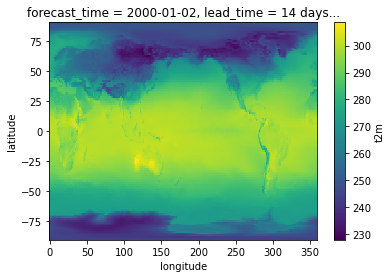

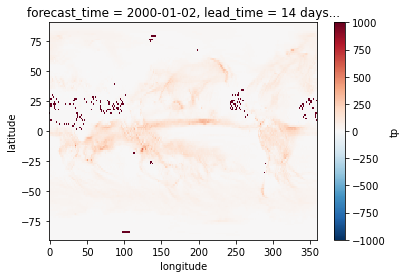

In [6]:
hind_for_plot = hind_2000_2019.isel(lead_time = 0, forecast_time =0, realization = 0)
hind_for_plot = xr.where(np.isnan(hind_for_plot), 1000, hind_for_plot)
hind_for_plot['t2m'].plot()
plt.figure()
hind_for_plot['tp'].plot()

In [7]:
#print((np.isnan(hind_2000_2019.t2m.values)).sum())
#print((np.isnan(hind_2000_2019.tp.values)).sum())
#print((np.isnan(hind_2000_2019.isel(forecast_time =0).tp.values)).sum())

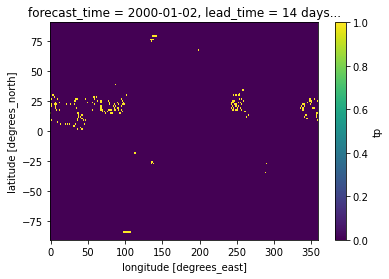

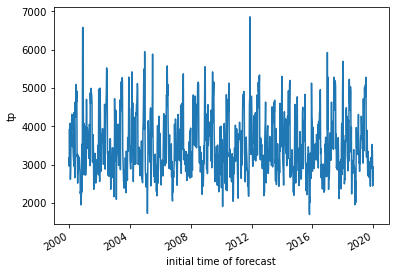

In [8]:
hind_2000_2019_nans_tp = xr.where(np.isnan(hind_2000_2019.tp), 1, 0)
hind_2000_2019_nans_tp.isel(lead_time = 0, forecast_time = 0, realization = 0).plot()
plt.figure()
hind_2000_2019_nans_tp.sum(('lead_time', 'latitude', 'longitude', 'realization')).plot()

### get weekly initialized forecasts

In [9]:
# preprocessed as renku dataset
!git lfs pull ../template/data/ecmwf_forecast-input_2020_biweekly_deterministic.zarr

In [10]:
fct_2020 = xr.open_zarr(f'{cache_path}/ecmwf_forecast-input_2020_biweekly_deterministic.zarr', consolidated=True)

In [11]:
fct_2020

<xarray.Dataset>
Dimensions:        (forecast_time: 53, latitude: 121, lead_time: 2, longitude: 240, realization: 51)
Coordinates:
  * forecast_time  (forecast_time) datetime64[ns] 2020-01-02 ... 2020-12-31
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * lead_time      (lead_time) timedelta64[ns] 14 days 28 days
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
  * realization    (realization) int64 0 1 2 3 4 5 6 7 ... 44 45 46 47 48 49 50
    valid_time     (lead_time, forecast_time) datetime64[ns] dask.array<chunksize=(2, 53), meta=np.ndarray>
Data variables:
    t2m            (lead_time, realization, forecast_time, latitude, longitude) float32 dask.array<chunksize=(2, 51, 11, 121, 240), meta=np.ndarray>
    tp             (lead_time, realization, forecast_time, latitude, longitude) float32 dask.array<chunksize=(2, 51, 11, 121, 240), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_edition:            2
    GRIB_subCentre:          0
    history:                 2021-05-10T15:46:13 GRIB to CDM+CF via cfgrib-0....
    institution:             European Centre for Medium-Range Weather Forecasts
    postprocessed_by:        https://renkulab.io/gitlab/aaron.spring/s2s-ai-c...

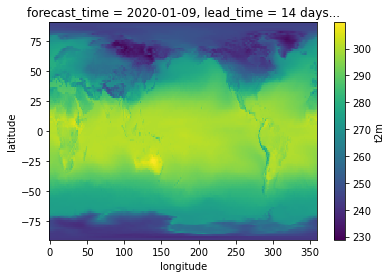

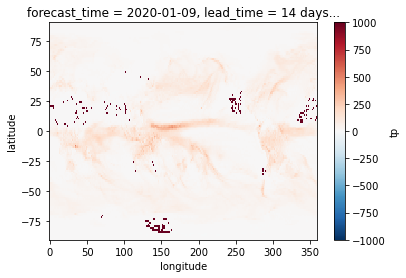

In [12]:
fct_for_plot = fct_2020.isel(lead_time = 0, forecast_time =1, realization = 0)
fct_for_plot = xr.where(np.isnan(fct_for_plot), 1000, fct_for_plot)
fct_for_plot['t2m'].plot()
plt.figure()
fct_for_plot['tp'].plot()

In [13]:
#print((np.isnan(fct_2020.t2m.values)).sum())
#print((np.isnan(fct_2020.tp.values)).sum())
#print((np.isnan(fct_2020.isel(forecast_time =0).tp.values)).sum())

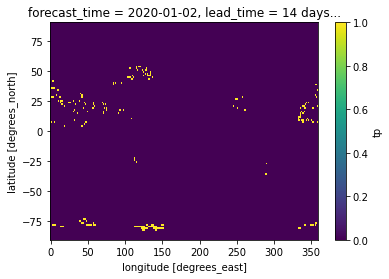

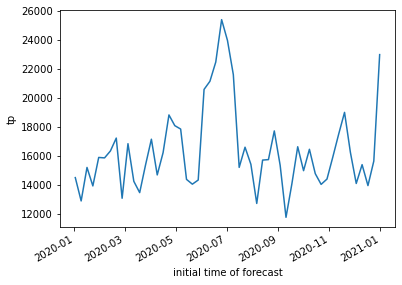

In [14]:
fct_2020_nans_tp = xr.where(np.isnan(fct_2020.tp), 1, 0)
fct_2020_nans_tp.isel(lead_time = 0, forecast_time = 0, realization = 0).plot()
plt.figure()
fct_2020_nans_tp.sum(('lead_time', 'latitude', 'longitude', 'realization')).plot()

## Observations
corresponding to hindcasts

In [15]:
# preprocessed as renku dataset
!git lfs pull ../template/data/hindcast-like-observations_2000-2019_biweekly_deterministic.zarr

In [16]:
obs_2000_2019 = xr.open_zarr(f'{cache_path}/hindcast-like-observations_2000-2019_biweekly_deterministic.zarr', consolidated=True)#[v]

In [17]:
obs_2000_2019#.t2m

<xarray.Dataset>
Dimensions:        (forecast_time: 1060, latitude: 121, lead_time: 2, longitude: 240)
Coordinates:
  * forecast_time  (forecast_time) datetime64[ns] 2000-01-02 ... 2019-12-31
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * lead_time      (lead_time) timedelta64[ns] 14 days 28 days
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
    valid_time     (lead_time, forecast_time) datetime64[ns] dask.array<chunksize=(2, 1060), meta=np.ndarray>
Data variables:
    t2m            (lead_time, forecast_time, latitude, longitude) float32 dask.array<chunksize=(2, 530, 121, 240), meta=np.ndarray>
    tp             (lead_time, forecast_time, latitude, longitude) float32 dask.array<chunksize=(2, 530, 121, 240), meta=np.ndarray>
Attributes:
    created_by_script:    tools/observations/makefile
    created_by_software:  climetlab-s2s-ai-challenge
    function:             climetlab_s2s_ai_challenge.extra.forecast_like_obse...
    postprocessed_by:     https://renkulab.io/gitlab/aaron.spring/s2s-ai-chal...
    source_dataset_name:  NOAA NCEP CPC UNIFIED_PRCP GAUGE_BASED GLOBAL v1p0 ...
    source_hosting:       IRIDL
    source_url:           http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/...

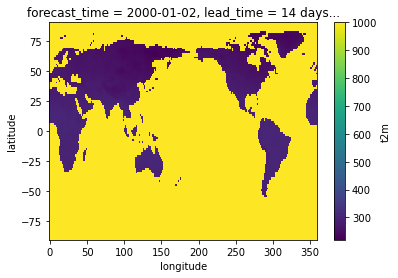

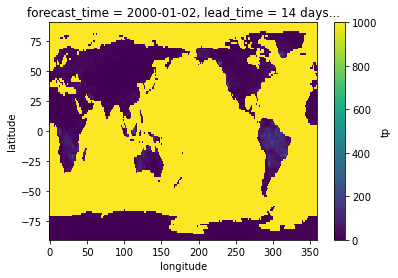

In [18]:
obs_for_plot = obs_2000_2019.isel(lead_time = 0, forecast_time =0)
obs_for_plot = xr.where(np.isnan(obs_for_plot), 1000, obs_for_plot)
obs_for_plot['t2m'].plot()
plt.figure()
obs_for_plot['tp'].plot()

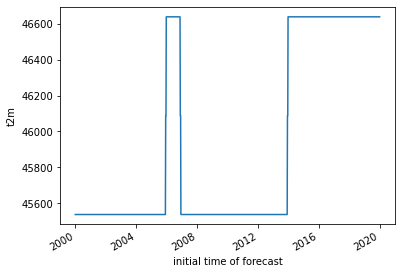

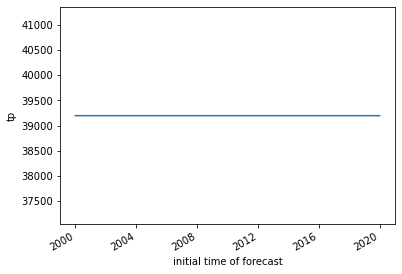

In [19]:
obs_2000_2019_nans_t2m = xr.where(np.isnan(obs_2000_2019.t2m), 1, 0)
#obs_2000_2019_nans_tp.isel(lead_time = 0, forecast_time = 0).plot()
plt.figure()
obs_2000_2019_nans_t2m.sum(('lead_time', 'latitude', 'longitude')).plot()

obs_2000_2019_nans_tp = xr.where(np.isnan(obs_2000_2019.tp), 1, 0)
#obs_2000_2019_nans_tp.isel(lead_time = 0, forecast_time = 0).plot()
plt.figure()
obs_2000_2019_nans_tp.sum(('lead_time', 'latitude', 'longitude')).plot()

corresponding to forecasts

In [20]:
# preprocessed as renku dataset
!git lfs pull ../template/data/forecast-like-observations_2020_biweekly_deterministic.zarr

In [21]:
obs_2020 = xr.open_zarr(f'{cache_path}/forecast-like-observations_2020_biweekly_deterministic.zarr', consolidated=True)

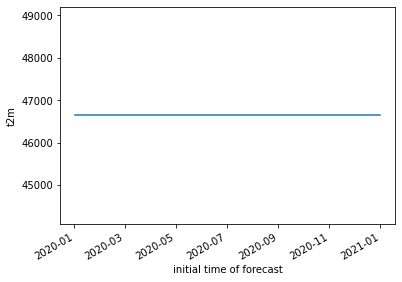

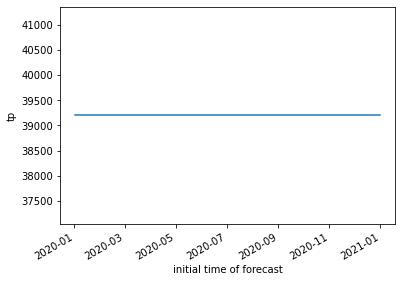

In [22]:
obs_2020_nans_t2m = xr.where(np.isnan(obs_2020.t2m), 1, 0)
#obs_2000_2019_nans_tp.isel(lead_time = 0, forecast_time = 0).plot()
plt.figure()
obs_2020_nans_t2m.sum(('lead_time', 'latitude', 'longitude')).plot()

obs_2020_nans_tp = xr.where(np.isnan(obs_2020.tp), 1, 0)
#obs_2000_2019_nans_tp.isel(lead_time = 0, forecast_time = 0).plot()
plt.figure()
obs_2020_nans_tp.sum(('lead_time', 'latitude', 'longitude')).plot()

## Terciled:
hindcast-like-obs

In [23]:
!git lfs pull ../template/data/hindcast-like-observations_2000-2019_biweekly_terciled.zarr

In [24]:
obs_2000_2019_terciled = xr.open_zarr(f'{cache_path}/hindcast-like-observations_2000-2019_biweekly_terciled.zarr', consolidated=True)

In [25]:
obs_2000_2019_terciled

<xarray.Dataset>
Dimensions:        (category: 3, forecast_time: 1060, latitude: 121, lead_time: 2, longitude: 240)
Coordinates:
  * category       (category) <U12 'below normal' 'near normal' 'above normal'
  * forecast_time  (forecast_time) datetime64[ns] 2000-01-02 ... 2019-12-31
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * lead_time      (lead_time) timedelta64[ns] 14 days 28 days
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
    valid_time     (lead_time, forecast_time) datetime64[ns] dask.array<chunksize=(2, 1060), meta=np.ndarray>
Data variables:
    t2m            (category, lead_time, forecast_time, latitude, longitude) float32 dask.array<chunksize=(1, 2, 530, 121, 240), meta=np.ndarray>
    tp             (category, lead_time, forecast_time, latitude, longitude) float32 dask.array<chunksize=(1, 2, 530, 121, 240), meta=np.ndarray>

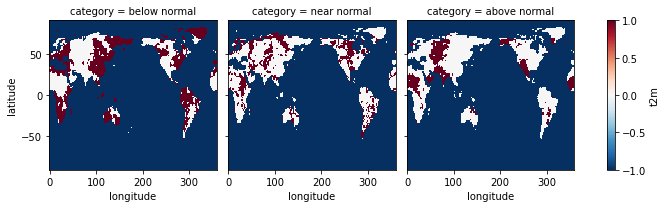

<Figure size 432x288 with 0 Axes>

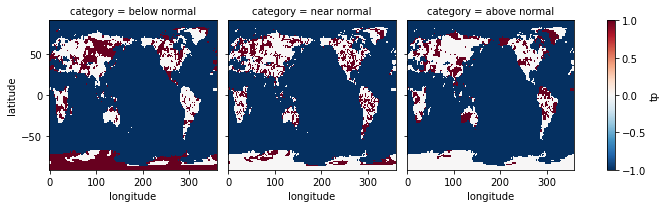

In [26]:
obs_terciled_for_plot = obs_2000_2019_terciled.isel(lead_time = 0, forecast_time =0)#cat = 1 or 2 yields strange results
#contains: 0,1, and nan
#should be one-hot-encoded-->bug in our version of the dataset
obs_terciled_for_plot = xr.where(np.isnan(obs_terciled_for_plot), -1, obs_terciled_for_plot)
obs_terciled_for_plot['t2m'].plot(col = 'category')
plt.figure()
obs_terciled_for_plot['tp'].plot(col = 'category')

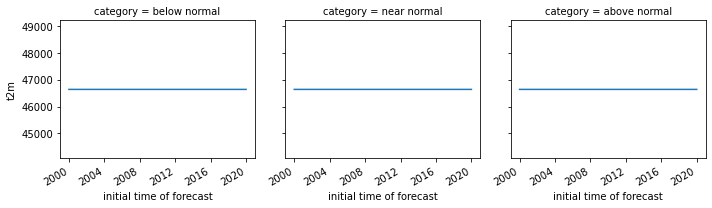

In [27]:
obs_terciled_nans_t2m = xr.where(np.isnan(obs_2000_2019_terciled.t2m), 1, 0)
obs_terciled_nans_t2m.sum(('lead_time', 'latitude', 'longitude')).plot(col = 'category')

In [28]:
np.unique(obs_terciled_for_plot['tp'].values)

array([-1.,  0.,  1.], dtype=float32)

forecast-like-obs

In [29]:
!git lfs pull ../template/data/forecast-like-observations_2020_biweekly_terciled.nc

In [30]:
obs_2020_terciled = xr.open_dataset(f'{cache_path}/forecast-like-observations_2020_biweekly_terciled.nc')

In [31]:
obs_2020_terciled

<xarray.Dataset>
Dimensions:        (category: 3, lead_time: 2, forecast_time: 53, latitude: 121, longitude: 240)
Coordinates:
  * forecast_time  (forecast_time) datetime64[ns] 2020-01-02 ... 2020-12-31
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * lead_time      (lead_time) timedelta64[ns] 14 days 28 days
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
    valid_time     (lead_time, forecast_time) datetime64[ns] ...
  * category       (category) object 'below normal' 'near normal' 'above normal'
Data variables:
    t2m            (category, lead_time, forecast_time, latitude, longitude) float32 ...
    tp             (category, lead_time, forecast_time, latitude, longitude) float32 ...

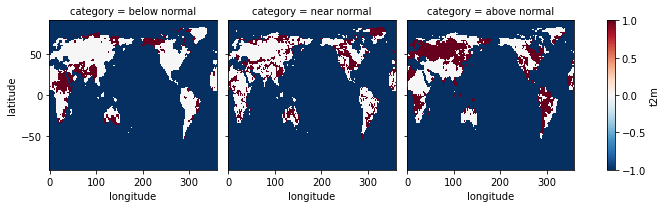

<Figure size 432x288 with 0 Axes>

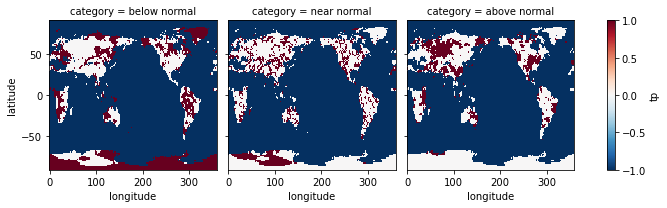

In [32]:
obs_2020_terciled_for_plot = obs_2020_terciled.isel(lead_time = 0, forecast_time =0)
obs_2020_terciled_for_plot = xr.where(np.isnan(obs_2020_terciled_for_plot), -1, obs_2020_terciled_for_plot)
obs_2020_terciled_for_plot['t2m'].plot(col = 'category')
plt.figure()
obs_2020_terciled_for_plot['tp'].plot(col = 'category')

### tercile edges

In [33]:
!git lfs pull ../template/data/hindcast-like-observations_2000-2019_biweekly_tercile-edges.nc

In [34]:
hind_2000_2019_trecile_edges = xr.open_dataset(f'{cache_path}/hindcast-like-observations_2000-2019_biweekly_tercile-edges.nc')

In [35]:
#teciles depend on week of the year and lead_time!
hind_2000_2019_trecile_edges

<xarray.Dataset>
Dimensions:        (week: 53, category_edge: 2, lead_time: 2, latitude: 121, longitude: 240)
Coordinates:
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * lead_time      (lead_time) timedelta64[ns] 14 days 28 days
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
  * category_edge  (category_edge) float64 0.3333 0.6667
  * week           (week) int64 1 2 3 4 5 6 7 8 9 ... 45 46 47 48 49 50 51 52 53
Data variables:
    t2m            (week, category_edge, lead_time, latitude, longitude) float32 ...
    tp             (week, category_edge, lead_time, latitude, longitude) float32 ...
Attributes:
    created_by_script:    tools/observations/makefile
    created_by_software:  climetlab-s2s-ai-challenge
    function:             climetlab_s2s_ai_challenge.extra.forecast_like_obse...
    postprocessed_by:     https://renkulab.io/gitlab/aaron.spring/s2s-ai-chal...
    regrid_method:        conservative
    source_dataset_name:  NOAA NCEP CPC UNIFIED_PRCP GAUGE_BASED GLOBAL v1p0 ...
    source_hosting:       IRIDL
    source_url:           http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/...

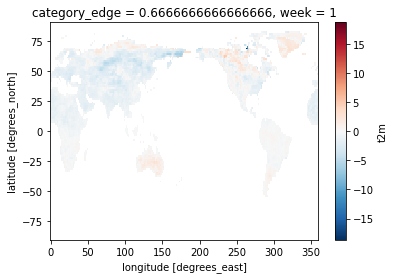

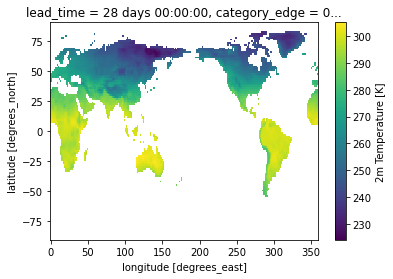

In [36]:
(hind_2000_2019_trecile_edges.sel(week = 1).t2m.isel(lead_time =0, category_edge = 1) -hind_2000_2019_trecile_edges.sel(week = 1).t2m.isel(lead_time =1, category_edge = 1)).plot()
plt.figure()
hind_2000_2019_trecile_edges.sel(week = 1).t2m.isel(lead_time =1, category_edge = 0).plot()

## ecmwf recalibrated benchmark

In [37]:
!git lfs pull ../template/data/ecmwf_recalibrated_benchmark_2020_biweekly_terciled.nc

In [38]:
ecmwf_benchmark = xr.open_dataset(f'{cache_path}/ecmwf_recalibrated_benchmark_2020_biweekly_terciled.nc')

In [39]:
ecmwf_benchmark

<xarray.Dataset>
Dimensions:        (category: 3, forecast_time: 53, lead_time: 2, latitude: 121, longitude: 240)
Coordinates:
  * category       (category) object 'below normal' 'near normal' 'above normal'
  * forecast_time  (forecast_time) datetime64[ns] 2020-01-02 ... 2020-12-31
  * lead_time      (lead_time) timedelta64[ns] 14 days 28 days
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
    valid_time     (forecast_time, lead_time) datetime64[ns] ...
Data variables:
    tp             (category, forecast_time, lead_time, latitude, longitude) float32 ...
    t2m            (category, forecast_time, lead_time, latitude, longitude) float32 ...

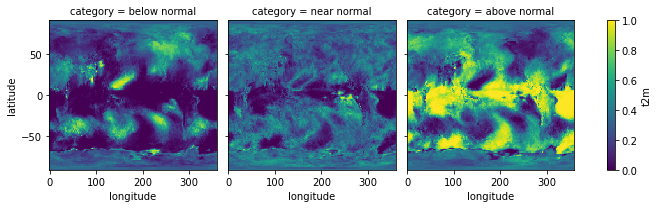

<Figure size 432x288 with 0 Axes>

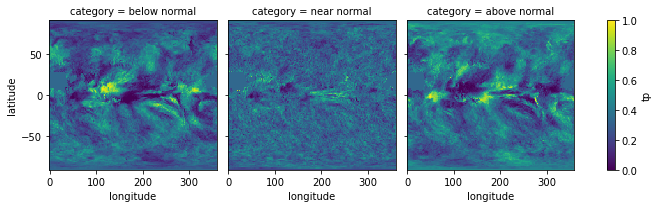

In [40]:
ecmwf_benchmark_for_plot = ecmwf_benchmark.isel(lead_time = 0, forecast_time =0)
ecmwf_benchmark_for_plot = xr.where(np.isnan(ecmwf_benchmark_for_plot), -1, ecmwf_benchmark_for_plot)
ecmwf_benchmark_for_plot['t2m'].plot(col = 'category')
plt.figure()
ecmwf_benchmark_for_plot['tp'].plot(col = 'category')